# **Project 20: Rain Predictor**

***Seaborn*** : *A Python data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.*

***Matplotlib*** : *A comprehensive library for creating static, animated, and interactive visualizations in Python.*

***Pandas*** : *A powerful data manipulation and analysis library for Python, offering data structures like DataFrame for handling structured data.*

***NumPy*** : *A fundamental package for scientific computing in Python, providing support for arrays, mathematical functions, and linear algebra operations.*

***Warnings*** : *A built-in Python module for issuing warning messages and managing warning filters.*







# **Data Loading**

**We these modules for Data Loading, Data Cleaning, Data Visualization and EDA (Explorotory Data Analysis).**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**warnings.simplefilter("ignore") is a command used to suppress all warning messages in Python.**

In [2]:
warnings.simplefilter("ignore")

**The code reads a CSV file named "weatherAUS.csv" into a DataFrame df and sets the display option to show all columns when the DataFrame is printed.**

In [3]:
df = pd.read_csv("/content/weatherAUS.csv")
pd.set_option("display.max_columns", None)

**To display the first five rows of the DataFrame df.**

In [4]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**df.info() provides a concise summary of the DataFrame.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# **Data Cleaning**

**df.isnull().sum() provides the number of missing values in each column of the DataFrame.**

In [6]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


**num_var: Creates a list of numerical columns from the DataFrame.**

**discrete_var: Creates a list of numerical columns that have fewer than 25 unique values.**

**cont_var: Creates a list of numerical columns that are not in the discrete variable list.**

**categ_var: Creates a list of non-numerical (categorical) columns from the DataFrame.**

In [7]:
num_var = [feature for feature in df.columns if df[feature].dtype != 'O']
discrete_var = [feature for feature in num_var if len(df[feature].unique()) < 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in df.columns if feature not in num_var]

**This command will output the DataFrame with only the columns that are in the "categ_var" list.**

In [8]:
df[categ_var]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


**This function takes a variable name as input and prints whether the variable is numerical and discrete, numerical and continuous, or categorical.**

In [9]:
def find_var_type(var):

    if var in discrete_var:
        print("{} Is A Numerical Variable, Discrete In Nature".format(var))

    elif var in cont_var:
        print("{} Is A Numerical Variable, Continuous In Nature".format(var))

    else:
        print("{} Is A Categorical Variable".format(var))

**We Provide the column name in this function then it tells me that if its a discrete, a numerical, or a categorical column.**

In [10]:
find_var_type("Cloud3pm")

Cloud3pm Is A Numerical Variable, Discrete In Nature


**The RandomSampleImputation function fills missing values in a specified feature of the DataFrame by randomly sampling from the existing non-null values.**

In [11]:
def RandomSampleImputation(df, feature):
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(), random_state=0)
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

**These lines apply the RandomSampleImputation function to fill missing values in the "Cloud9am," "Cloud3pm," "Evaporation," and "Sunshine" columns of the DataFrame df.**

In [12]:
RandomSampleImputation(df, "Cloud9am")
RandomSampleImputation(df, "Cloud3pm")
RandomSampleImputation(df, "Evaporation")
RandomSampleImputation(df, "Sunshine")

**This expression calculates the percentage of missing values for each column in the DataFrame df by multiplying the count of null values by 100 and dividing by the total number of rows.**

In [13]:
df.isnull().sum()*100/len(df)

,0
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,0.000000
Sunshine,0.000000
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853


**The function will classify 'RainToday' as a categorical variable.**

In [14]:
find_var_type('RainToday')

RainToday Is A Categorical Variable


**The code initializes a SimpleImputer to replace missing values in specified numerical columns of the DataFrame df with the mean of each column. It imputes missing values for "Pressure9am," "Pressure3pm," "MinTemp," "MaxTemp," "Rainfall," and "WindGustSpeed" using this strategy. Each column is updated in place with the imputed values.**

In [15]:
from sklearn.impute import SimpleImputer

Impute = SimpleImputer(strategy = 'mean')

df["Pressure9am"] = Impute.fit_transform(df[["Pressure9am"]])

df["Pressure3pm"] = Impute.fit_transform(df[["Pressure3pm"]])

df["MinTemp"] = Impute.fit_transform(df[["MinTemp"]])

df["MaxTemp"] = Impute.fit_transform(df[["MaxTemp"]])

df["Rainfall"] = Impute.fit_transform(df[["Rainfall"]])

df["WindGustSpeed"] = Impute.fit_transform(df[["WindGustSpeed"]])

**This code fills missing values in specific columns of the DataFrame df with the mean of each respective column for "WindSpeed9am," "WindSpeed3pm," "Humidity9am," "Humidity3pm," "Temp3pm," and "Temp9am." Afterward, it calculates the percentage of remaining missing values in the DataFrame.**

In [16]:
df["WindSpeed9am"] = df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean())
df["WindSpeed3pm"] = df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean())

df["Humidity9am"] = df["Humidity9am"].fillna(df["Humidity9am"].mean())
df["Humidity3pm"] = df["Humidity3pm"].fillna(df["Humidity3pm"].mean())

df["Temp3pm"] = df["Temp3pm"].fillna(df["Temp3pm"].mean())
df["Temp9am"] = df["Temp9am"].fillna(df["Temp9am"].mean())

df.isnull().sum()*100/len(df)

,0
Date,0.000000
Location,0.000000
MinTemp,0.000000
MaxTemp,0.000000
Rainfall,0.000000
Evaporation,0.000000
Sunshine,0.000000
WindGustDir,7.098859
WindGustSpeed,0.000000
WindDir9am,7.263853


# **Data Visualization**

**This code creates histograms for each continuous variable in cont_var by plotting the distribution of values using Seaborn's histplot, setting the x-label, y-label, and title for each plot, and displaying them in a 15x15 figure size.**

**In this, we create a count plot for each column in our database to visualize the count of each category.**


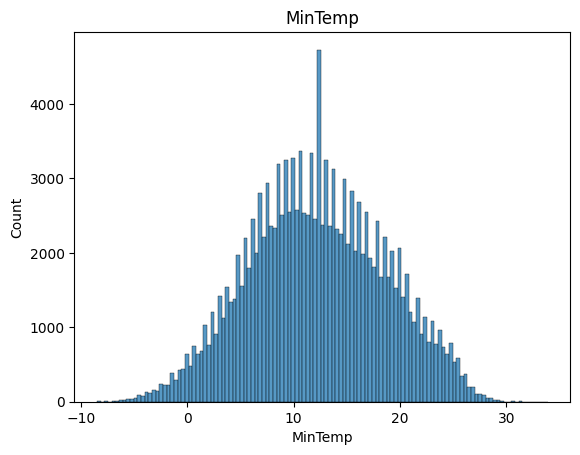

<Figure size 1500x1500 with 0 Axes>

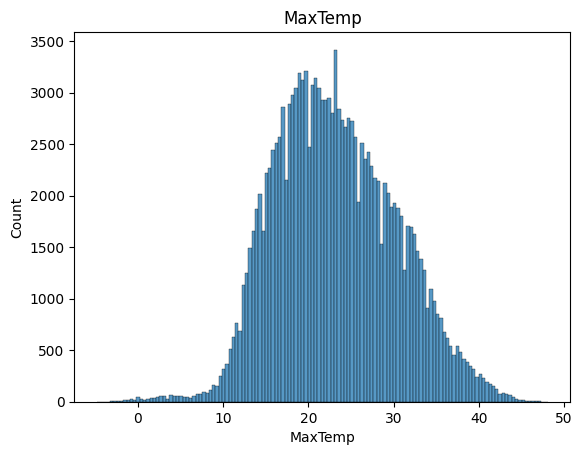

<Figure size 1500x1500 with 0 Axes>

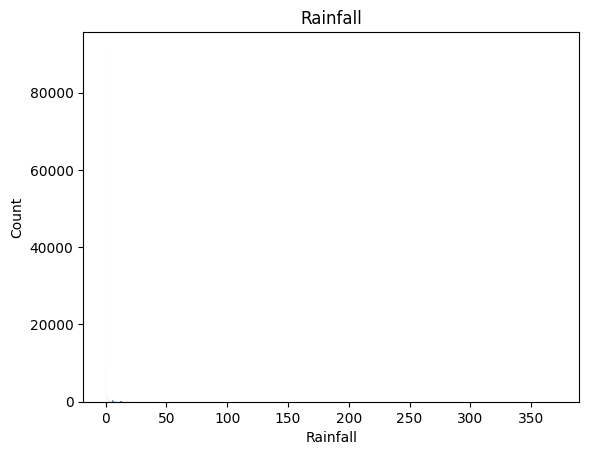

<Figure size 1500x1500 with 0 Axes>

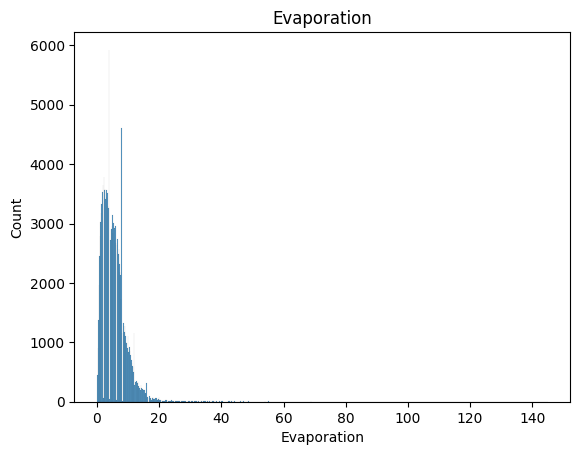

<Figure size 1500x1500 with 0 Axes>

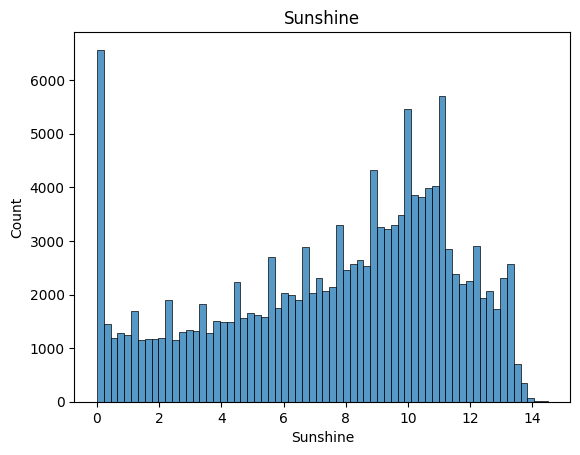

<Figure size 1500x1500 with 0 Axes>

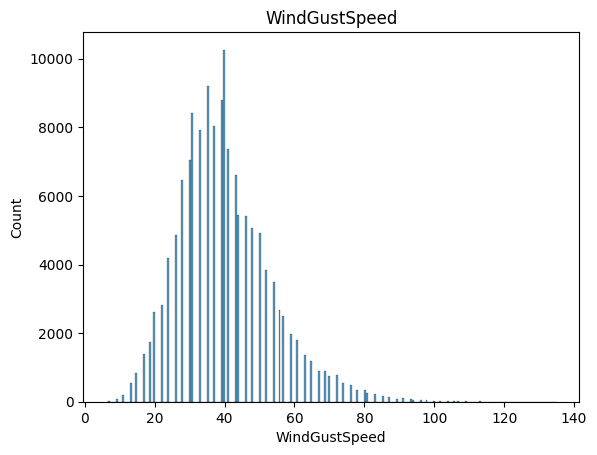

<Figure size 1500x1500 with 0 Axes>

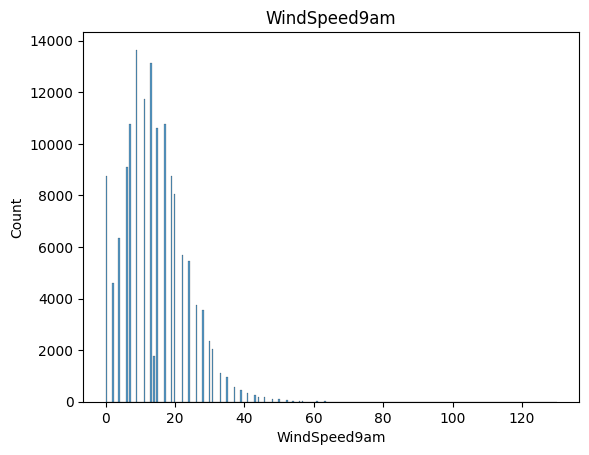

<Figure size 1500x1500 with 0 Axes>

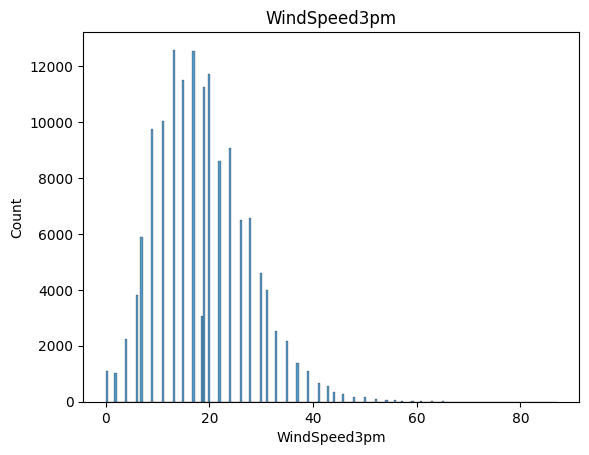

<Figure size 1500x1500 with 0 Axes>

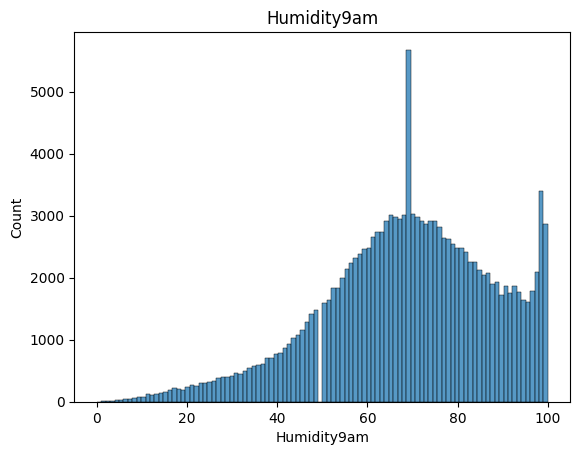

<Figure size 1500x1500 with 0 Axes>

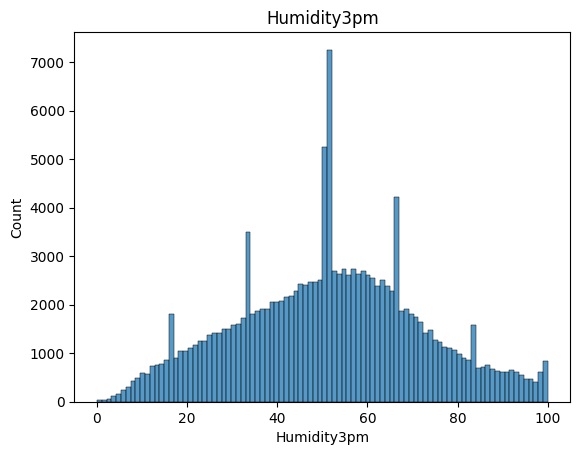

<Figure size 1500x1500 with 0 Axes>

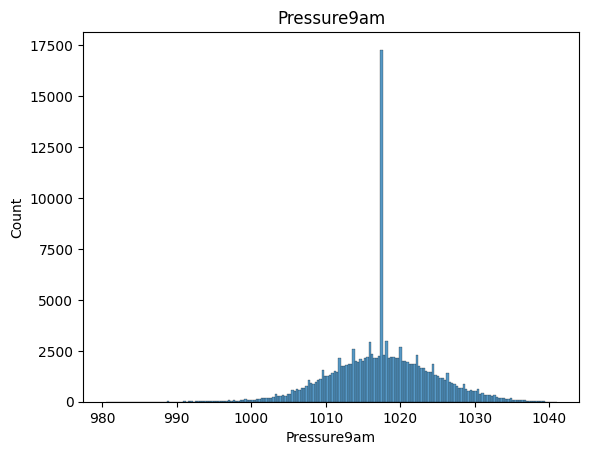

<Figure size 1500x1500 with 0 Axes>

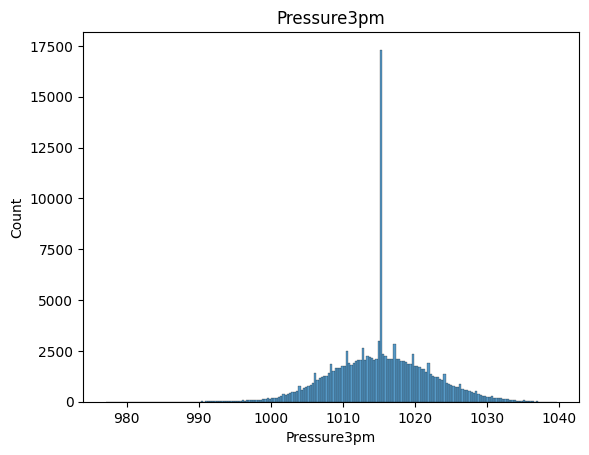

<Figure size 1500x1500 with 0 Axes>

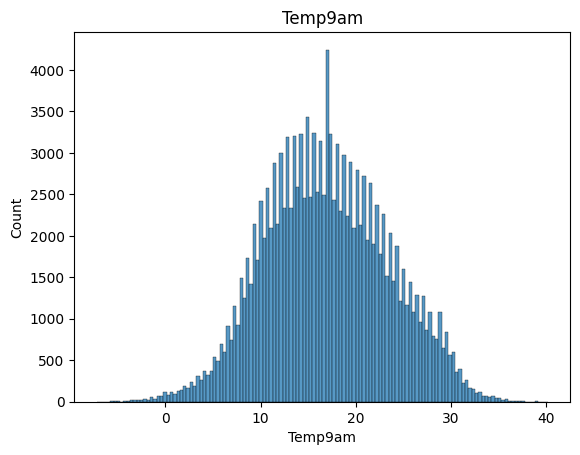

<Figure size 1500x1500 with 0 Axes>

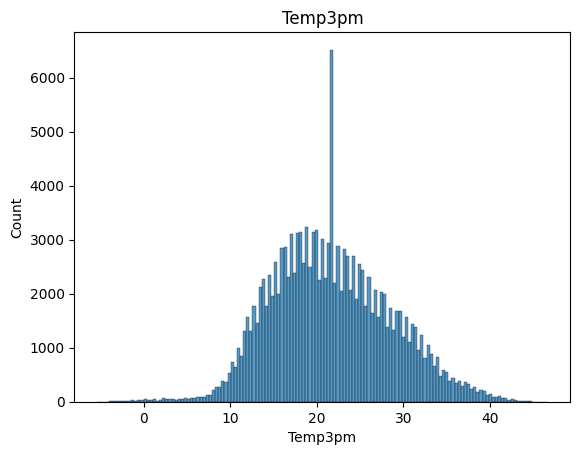

<Figure size 1500x1500 with 0 Axes>

In [17]:
for feature in cont_var:
    data=df.copy()
    sns.histplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

**This code applies LabelEncoder to transform the "RainToday" column in the DataFrame df into numerical values, encoding the categories as integers, and then displays the first five rows of the updated DataFrame.**

In [18]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

df["RainToday"] = Le.fit_transform(df["RainToday"])

df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,No


**This command checks for missing values in each column of the DataFrame df and returns the count of null values for each column.**

In [19]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,10326
WindGustSpeed,0
WindDir9am,10566


**This code fills missing values in the "RainTomorrow" column of the DataFrame df with the string "No Information" and then checks for any remaining missing values in the DataFrame.**

In [20]:
df["RainTomorrow"] = df["RainTomorrow"].fillna("No Information")
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,10326
WindGustSpeed,0
WindDir9am,10566


**This command counts the occurrences of each unique value in the "RainTomorrow" column of the DataFrame df, providing the frequency of each category.**

In [21]:
df["RainTomorrow"].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877
No Information,3267


**This code applies LabelEncoder to transform the "RainTomorrow" column in the DataFrame df into numerical values, encoding the categories as integers, and then displays the first five rows of the updated DataFrame.**

In [22]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

df["RainTomorrow"] = Le.fit_transform(df["RainTomorrow"])

df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


**This code maps the directional strings in the "WindGustDir," "WindDir9am," and "WindDir3pm" columns of the DataFrame df to numerical values using predefined dictionaries, effectively converting them to integer representations.**

In [23]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

**This code fills missing values in the "WindGustDir," "WindDir9am," and "WindDir3pm" columns with the most frequent (mode) value from each column, then calculates and displays the percentage of remaining missing values in the DataFrame.**

In [24]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

df.isnull().sum()*100/len(df)

,0
Date,0.0
Location,0.0
MinTemp,0.0
MaxTemp,0.0
Rainfall,0.0
Evaporation,0.0
Sunshine,0.0
WindGustDir,0.0
WindGustSpeed,0.0
WindDir9am,0.0


**This command displays the first five rows of the DataFrame df, showing the current state of the data after any transformations or imputations applied.**

In [25]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


**This code groups the DataFrame df by "Location" and counts the occurrences of "RainTomorrow," then sorts the counts and reshapes the result into a DataFrame where each location's counts for "RainTomorrow" are displayed, with the first five rows shown.**

In [26]:
df_loc = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df_loc.head(5)

RainTomorrow,0,1,2
Location,,,
Adelaide,2402.0,103.0,688.0
Albany,2114.0,24.0,902.0
Albury,2393.0,29.0,618.0
AliceSprings,2787.0,9.0,244.0
BadgerysCreek,2345.0,81.0,583.0


**This command calculates the number of unique locations in df_loc where it counts occurrences of "RainTomorrow" that are labeled as 1, sorted in descending order.**

In [27]:
len(df_loc[1].sort_values(ascending=False).index)

49

**This command sorts the counts of locations in df_loc where "RainTomorrow" is 1 (indicating rain tomorrow) in descending order, displaying the locations with the highest counts first.**

In [28]:
df_loc[1].sort_values(ascending = False)

,1
Location,
Melbourne,758.0
Williamtown,456.0
PearceRAAF,247.0
Walpole,187.0
Moree,155.0
MountGinini,133.0
Adelaide,103.0
Newcastle,84.0
BadgerysCreek,81.0


**This code maps the location names in the "Location" column of the DataFrame df to their corresponding integer values using the mapped_location dictionary, effectively converting the categorical locations into numerical representations.**

In [29]:
mapped_location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(mapped_location)

**This code converts the "Date" column to datetime format, extracts the year, month, and day into new columns named "Year," "Month," and "Day," respectively.**

In [30]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors = "coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

**This code drops the "Date" column from the DataFrame df and displays the first five rows of the updated DataFrame.**

In [31]:
df = df.drop(["Date"], axis=1)
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,2008,12,1
1,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,2008,12,2
2,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,2008,12,3
3,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,2008,12,4
4,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


**This command displays the list of column names in the DataFrame df.**

In [32]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

**This code creates a heatmap of the correlation matrix for the DataFrame df, displaying the correlation coefficients between features with annotations and using the "YlGnBu" color map, and shows the plot in a 20x20 figure.**

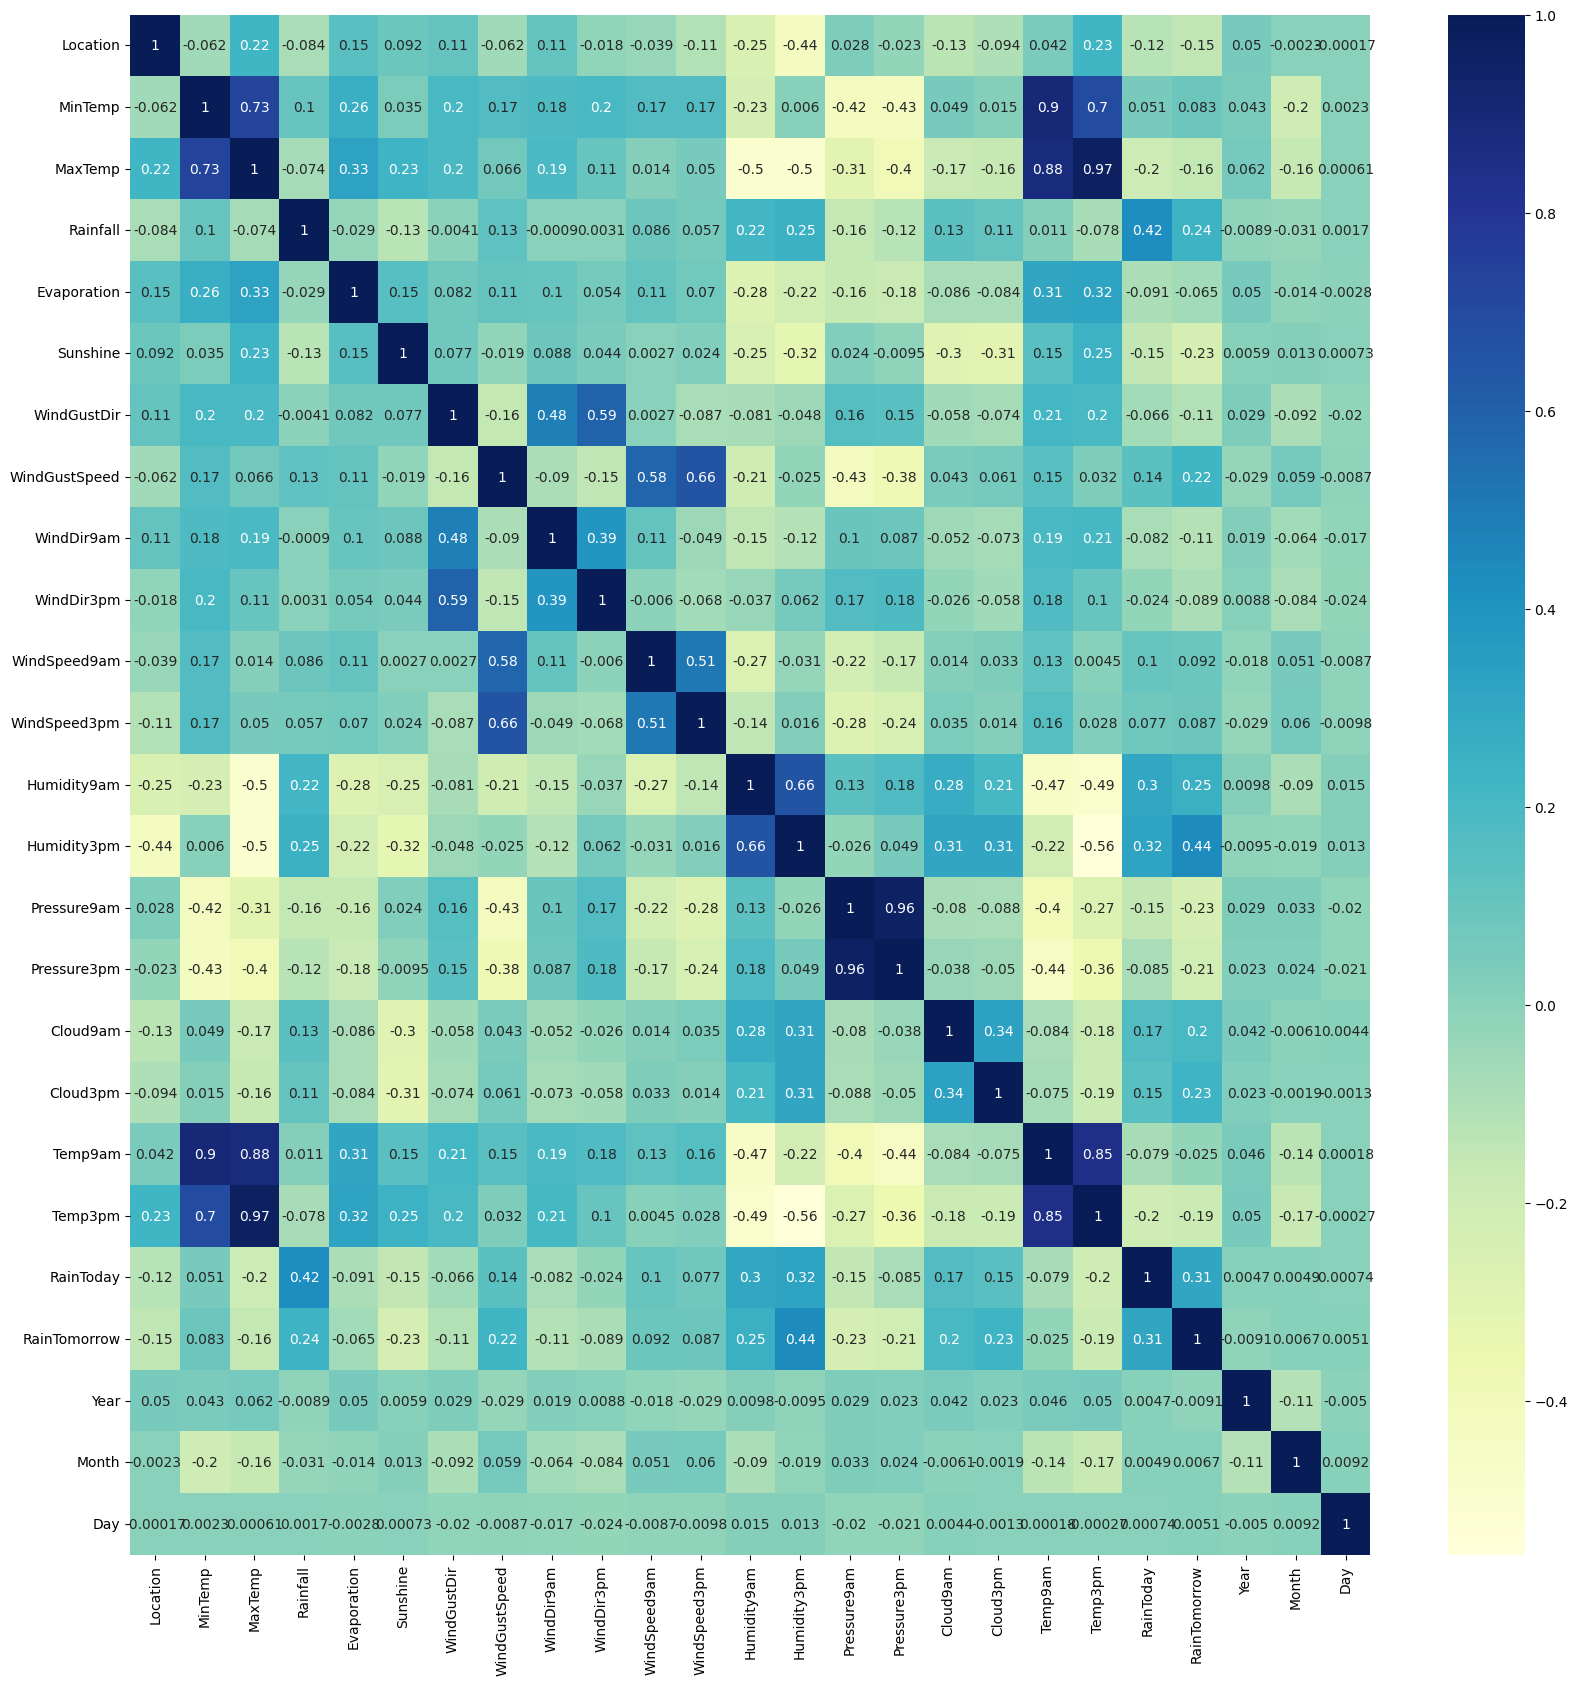

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

# **Model Building**

**This code defines the feature set X by selecting specified columns from the DataFrame df, and defines the target variable y as the "RainTomorrow" column, preparing the data for modeling.**

In [34]:
X = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Year', 'Month', 'Day']]

y = df[["RainTomorrow"]]

**This code initializes MinMaxScaler to scale the features in X and the target variable y to a range between 0 and 1, transforming them into pandas DataFrames.**

In [35]:
from sklearn.preprocessing import MinMaxScaler

Scaler_X = MinMaxScaler().set_output(transform="pandas")

X = Scaler_X.fit_transform(X)

Scaler_y = MinMaxScaler().set_output(transform="pandas")

y = Scaler_y.fit_transform(y)

**These lines import the train_test_split function to divide the dataset into training and testing sets and the mean_squared_error metric to evaluate model performance by calculating the average squared difference between predicted and actual values.**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**This line splits the feature set X and target variable y into training and testing sets, using 80% of the data for training and 20% for testing.**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

**1: Model Initialization: Initializes a RandomForestRegressor with a maximum depth of 10 and a minimum sample split of 5.**

**2: Model Training: Fits the model to the training data using X_train and y_train.**

**3: Prediction: Uses the trained model to predict target values for the test set X_test.**

**4: Evaluation: Calculates the Mean Squared Error (MSE) of the predictions compared to the actual values in y_test and prints the result.**

In [38]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(n_jobs= -1)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Linear Regression Mean Squared Error:", MSE)

Linear Regression Mean Squared Error: 0.1168982716813148


**1: Model Initialization: Initializes a RandomForestRegressor with a maximum depth of 10 and a minimum sample split of 5.**

**2: Model Training: Fits the model to the training data using X_train and y_train.**

**3: Prediction: Uses the trained model to predict target values for the test set X_test.**

**4: Evaluation: Calculates the Mean Squared Error (MSE) of the predictions compared to the actual values in y_test and prints the result.**

In [39]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(max_depth=10, min_samples_split=5)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Random Forest Mean Squared Error:", MSE)

Random Forest Mean Squared Error: 0.10694102373524333


**1: Model Initialization: Initializes a DecisionTreeRegressor with a maximum of 10 features considered for splitting.**

**2: Model Training: Fits the model to the training data using X_train and y_train.**

**3: Prediction: Uses the trained model to predict target values for the test set X_test.**

**4: Evaluation: Calculates the Mean Squared Error (MSE) of the predictions compared to the actual values in y_test and prints the result.**

In [40]:
from sklearn.tree import DecisionTreeRegressor

DTC = DecisionTreeRegressor(max_features=10)

DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Decision Tree Mean Squared Error:", MSE)

Decision Tree Mean Squared Error: 0.21429430771346075


**1: Model Initialization: Initializes a Ridge regression model with an alpha of 10 and a random state of 0.**

**2: Model Training: Fits the model to the training data using X_train and y_train.**

**3: Prediction: Uses the trained model to predict target values for the test set X_test.**

**4: Evaluation: Calculates the Mean Squared Error (MSE) of the predictions compared to the actual values in y_test and prints the result.**

In [41]:
from sklearn.linear_model import Ridge

Rg = Ridge(alpha=10, random_state=0)

Rg.fit(X_train, y_train)

y_pred = Rg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Ridge Regression Mean Squared Error:", MSE)

Ridge Regression Mean Squared Error: 0.11697654937292293


**1: Model Initialization: Initializes a Lasso regression model with a maximum of 20 iterations.**

**2: Model Training: Fits the model to the training data using X_train and y_train.**

**3: Prediction: Uses the trained model to predict target values for the test set X_test.**

**4: Evaluation: Calculates the Mean Squared Error (MSE) of the predictions compared to the actual values in y_test and prints the result.**

In [42]:
from sklearn.linear_model import Lasso

Ls = Lasso(max_iter=20)

Ls.fit(X_train, y_train)

y_pred = Ls.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Lasso Regression Mean Squared Error:", MSE)

Lasso Regression Mean Squared Error: 0.1711796743856589


# **Conclusion:**

- **Linear Regression Mean Squared Error: 0.1168**
- **Random Forest Mean Squared Error: 0.1069**
- **Decision Tree Mean Squared Error: 0.2142**
- **Ridge Regression Mean Squared Error: 0.1169**
- **Lasso Regression Mean Squared Error: 0.1711**

**Based on the Mean Squared Error (MSE) results, the Random Forest Regressor (0.1069) outperformed all other models. Therefore, we chose the Random Forest Regressor as the best model for our further prediction task.**

# **Save Model**

**This code saves the trained RandomForestRegressor model to a file named "Finalized-Model.pickle" using the pickle module.**

In [43]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(RFR, file)